In [255]:
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=4) # Size of the plots

# <font color='#FD7C6E'>Programming (Part 2) </font>

## Writing Functions

nameoffunction **<- function(** parameters **){**

... whatever the functions does..

return value (optional)

**}**

In [256]:
multiply_by_42 <- function(x){
    multiplication <- x * 42
    multiplication
}

In [257]:
multiply_by_42(2)

[1] 84

In [258]:
create_hist <- function(x) {
   mydataframe <- data.frame(x)
   ggplot(data=mydataframe, aes(x)) + geom_histogram(fill="#57C3E7", color="black")
}

create_plot <- function(x, y) {
   mydataframe <- data.frame(x,y)
   ggplot(data=mydataframe, aes(x,y)) + geom_jitter(color="#FF8E72")
}


## IF statements

In [259]:
value <- 10
if (value>8){
    print("This number is bigger than 8")
} else {
    print("This number is smaller than 8")
}

[1] "This number is bigger than 8"


## For-loops

In [260]:
for (i in 1:5){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


In [261]:
x <- c(2,5,3,9,8,11,6)
count <- 0

for (val in x) {
    if(val > 7) {
        count = count+1}
}
print(count)

[1] 3


# <font color='#FD7C6E'>The Normal Distribution </font>

We will learn to use the functions : **dnorm()**, **pnorm()**, and **rnorm()**

### **dnorm()** 

Gives the **height** of the probability distribution at each point. **NOT** the probability. In continuous distributions the area below the curve is the probability

In [262]:
dnorm(100, mean = 100, sd = 10)
dnorm(90, mean = 100, sd = 10)
dnorm(110, mean = 100, sd = 10)

[1] 0.03989423

[1] 0.02419707

[1] 0.02419707

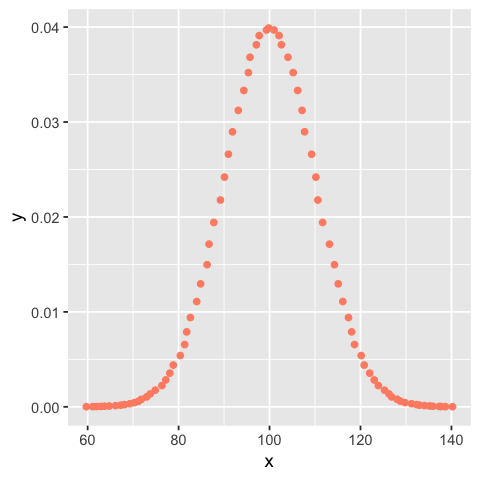

In [263]:
x <- 60:140
y <- dnorm(x, mean = 100, sd = 10)
create_plot(x,y)

### **pnorm()** 

Gives the probability of the value being less than a given number = cumulative distribution function

Q: What is the probability of X being less than 100?

In [76]:
pnorm(100, mean = 100, sd = 10)

[1] 0.5

Q: What is the probability of X being more than 130?

In [77]:
1 - pnorm(130, mean = 100, sd = 10)

[1] 0.001349898

Q: What is the probability of X being between 90 and 110? 

In [79]:
pnorm(110, mean = 100, sd = 10) - pnorm(90, mean = 100, sd = 10)

[1] 0.6826895

Q: What is the probability of X being between 2 standard deviations? 

In [80]:
pnorm(120, mean = 100, sd = 10) - pnorm(80, mean = 100, sd = 10)

[1] 0.9544997

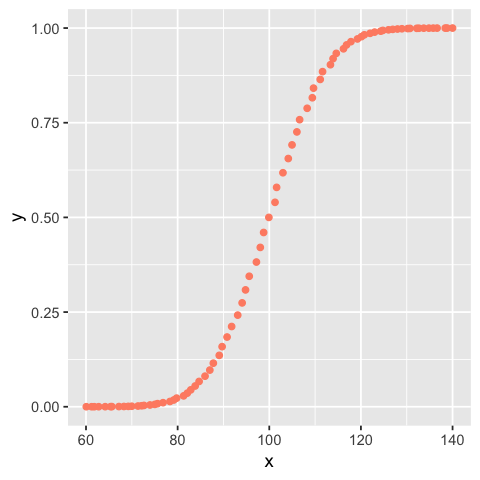

In [250]:
x <- 60:140
y <- pnorm(x, mean = 100, sd = 10)
create_plot(x,y)

### **rnorm()** 

Generates random numbers from a normal distribution

In [89]:
rnorm(5, mean = 100, sd = 10)

[1] 123.35082 113.53947 102.63129  98.67746 102.15344

[1] 100.9886

[1] 10.50564

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


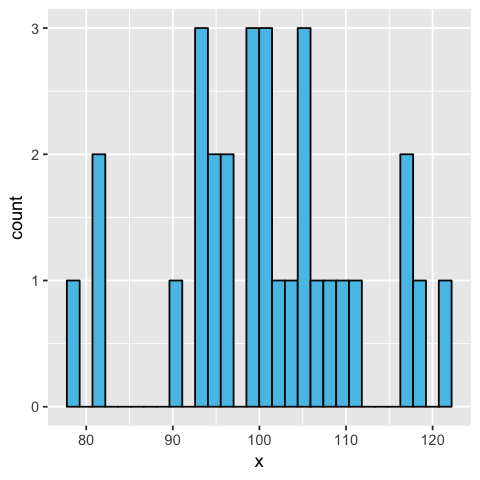

In [264]:
y <- rnorm(30, mean = 100, sd = 10)
mean(y)
sd(y)
create_hist(y)

[1] 99.37419

[1] 9.897626

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


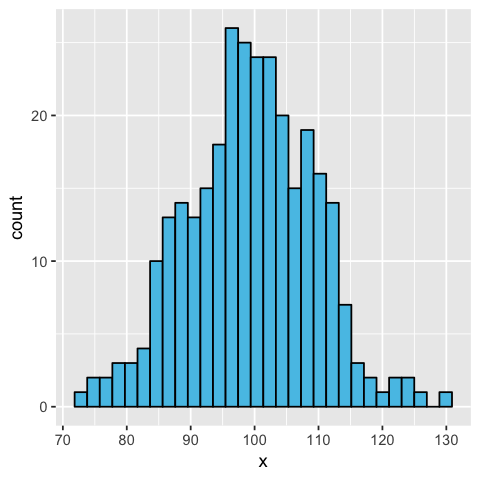

In [265]:
y <- rnorm(300, mean = 100, sd = 10)
mean(y)
sd(y)
create_hist(y)

[1] 100.0122

[1] 9.949921

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


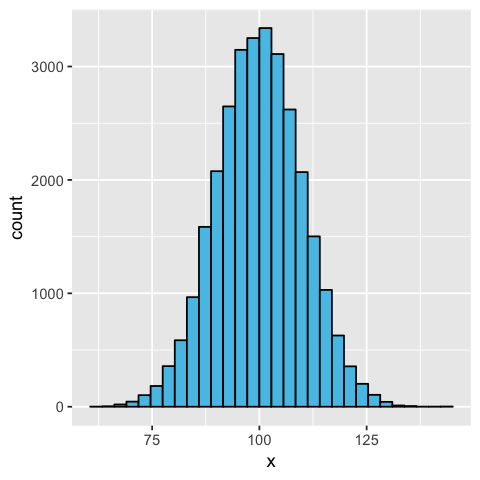

In [266]:
y <- rnorm(30000, mean = 100, sd = 10)
mean(y)
sd(y)
create_hist(y)

## Z-scores

[1] 1.713444e-17

[1] 1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


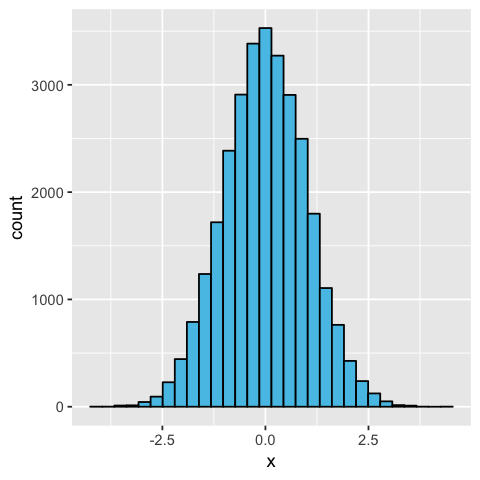

In [267]:
y <- rnorm(30000, mean = 100, sd = 10)
y_scores <- scale(y)
mean(y_scores)
sd(y_scores)
create_hist(y_scores)

# <font color='#FD7C6E'>Sample Distribution and Standard Error </font>

In [268]:
# Last time we use the Pokemon dataset!
pokemon.df <- read.csv("pokemon.csv")
attack <- pokemon.df$Attack
"Number of pokemons:"
length(attack)
"This is the true mean attack of the Pokemon population"
mean(attack)

[1] "Number of pokemons:"

[1] 800

[1] "This is the true mean attack of the Pokemon population"

[1] 79.00125

In [269]:
pokemon_sample <- sample(attack,10)
sample_mean <- mean(pokemon_sample)
sample_mean

[1] 88.5

In [270]:
SAMPLE_SIZE <- 10
NUMBER_SAMPLES <- 40

attack_means <- c()
for (i in 1:NUMBER_SAMPLES){
    pokemon_sample <- sample(attack, SAMPLE_SIZE)
    sample_mean <- mean(pokemon_sample)
    attack_means <- c(attack_means, sample_mean)
}
attack_means

mean(attack_means)

[1]  77.4 100.2  71.4  80.8  62.5  69.2  77.6  93.1  85.0  84.1  72.1  86.8
[13]  67.4  85.0  74.9  62.3  64.0  81.8  79.8  90.0  60.2  75.2  55.5  82.7
[25]  85.1  75.2  75.8  67.7  78.8  82.0  74.9  68.9  72.9  94.7  84.0  72.2
[37]  82.6  94.4  82.5  84.9

[1] 77.89

In [271]:
"STANDARD ERROR"
sd(attack_means)
"STANDARD ERROR (Central Limit Theorem)"
sd(attack) / sqrt(SAMPLE_SIZE) 

[1] "STANDARD ERROR"

[1] 10.03501

[1] "STANDARD ERROR (Central Limit Theorem)"

[1] 10.26392

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


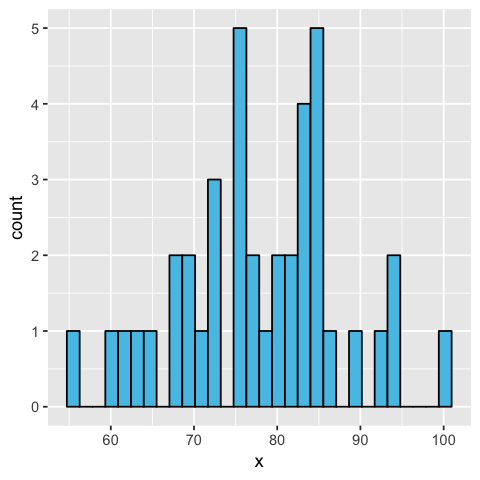

In [272]:
create_hist(attack_means)

In [273]:
pokemon_sample <- sample(attack,50)
sample_mean <- mean(pokemon_sample)
sample_mean

[1] 75.24

In [274]:
SAMPLE_SIZE <- 50
NUMBER_SAMPLES <- 40

attack_means <- c()
for (i in 1:NUMBER_SAMPLES){
    pokemon_sample <- sample(attack, SAMPLE_SIZE)
    sample_mean <- mean(pokemon_sample)
    attack_means <- c(attack_means, sample_mean)
}

mean(attack_means)

[1] 78.566

In [275]:
"STANDARD ERROR"
sd(attack_means)
"STANDARD ERROR (Central Limit Theorem)"
sd(attack) / sqrt(SAMPLE_SIZE) 

[1] "STANDARD ERROR"

[1] 4.444553

[1] "STANDARD ERROR (Central Limit Theorem)"

[1] 4.590165

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


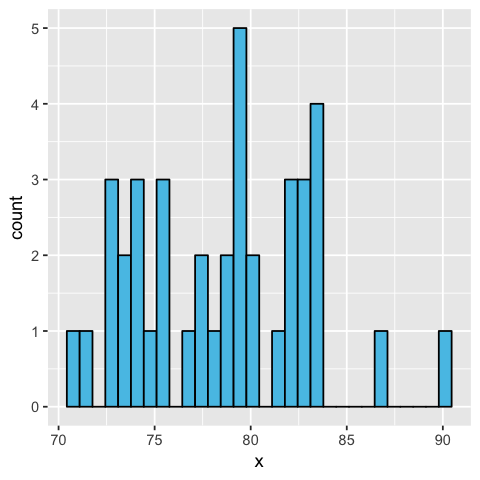

In [276]:
create_hist(attack_means)

In [277]:
SAMPLE_SIZE <- 50
NUMBER_SAMPLES <- 200

attack_means <- c()
for (i in 1:NUMBER_SAMPLES){
    pokemon_sample <- sample(attack, SAMPLE_SIZE)
    sample_mean <- mean(pokemon_sample)
    attack_means <- c(attack_means, sample_mean)
}


mean(attack_means)
sd(attack_means)

[1] 79.3148

[1] 4.638048

## Activity 1: Play with the SAMPLE_SIZE and NUMBER_SAMPLES to get a better feeling of how these two change the mean and standard error. 

## Activity 2: Write a function that accepts a vector, sums the elements and returns the total sum

In [49]:
sum_vector <- function(x){
    sum <- 0
    for (val in x){
        sum <- sum + val
    }
    sum
}

In [50]:
sum_vector(c(1,2,3,4,5))

[1] 15

## Activity 3: Write a function that calculates the mean of a vector.

You can't use the predefined function mean()! But you can use your own defined functions.

In [53]:
mean_vector <- function(x){
    sum_vector(x)/length(x)
}

In [54]:
mean_vector(c(1,2,3,4,5))

[1] 3

## Activity 4: Write a function that calculates the standard deviation of a vector

You can't use the predefined function sd()! But you can use your own defined functions.

In [179]:
standard_deviation_vector <- function(x){
    mean_x <- mean_vector(x)
    sum_squares <- 0
    for(val in x){
        sum_squares <- sum_squares + (val - mean_x)^2
    }
    sqrt(sum_squares/(length(x) - 1))
}

In [60]:
standard_deviation_vector(c(1,2,3,4,5))

[1] 1.581139

## Activity 5: Write a function that calculates the estimated standard error of a vector only if the vector has more than 30 elements, otherwise the function should print "Size less than 30"

In [187]:
standard_error_vector <- function(x){
    if (length(x)>30){
        standard_deviation_vector(x)/sqrt(length(x))
        } else
        print("Size less than 30")
}

In [188]:
standard_error_vector(c(1,2,3,4,5))
standard_error_vector(c(84.2,77.6,71.7,71.2,70.8,105.9,72,89,92.7,88.9, 
                        61.3,70,77.8,72.1,49,70.8,62.5,76.5,81.2,79,65.1,76.6,
                        87.8,73.7,67.9,75.4,76,85.9,82.8,67.7,91.5,80.6))

[1] "Size less than 30"


[1] 1.930026

# <font color='#FD7C6E'>Confidence Intervals</font>

We know the population mean:

In [223]:
mean(attack)

[1] 79.00125

What if we only had 100 Pokemons and wanted to estimate how good the sample mean is?

In [278]:
set.seed(200) # This makes random sample always select the same sample. So that we all see the same results, 
              # you can change it!
attack_sample <- sample(attack,100)

The sample mean of these 100 Pokemons is:

In [279]:
sample_mean <- mean(attack_sample)
sample_mean

[1] 82.01

The standard error according to the central limit theorem is:

In [236]:
sd(attack)/sqrt(100)

[1] 3.245737

Formula Standard Error

In [280]:
formula_standard_error <- sd(attack_sample)/sqrt(100)
formula_standard_error

[1] 3.144676

Formula Confidence intervals:
\begin{equation*}
lower = sample\_mean - 1.96 * formula\_standard\_error
\end{equation*}

\begin{equation*}
upper = sample\_mean + 1.96 * formula\_standard\_error
\end{equation*}

In [283]:
sample_mean - 1.96 * attack_standard_error
sample_mean + 1.96 * attack_standard_error

[1] 75.64836

[1] 88.37164

Why -1.96 and +1.96? because it contains 95% of the area under the standard normal curve

In [217]:
qnorm(c(0.025,0.975))

[1] -1.959964  1.959964

We can find similar estimates using Bootstraping:

# <font color='#FD7C6E'>Bootstraping</font>

**BOOTSTRAPING ALGORITHM**
1. Draw a sample observation, record it, replace it. 
2. Repeat N times.
3. Record the mean of the n resampled values.
4. Repeat steps 1-3 R times (for example 1000 times or more)
5. With the R means, calculate the standard deviation. This estimates the sample mean standard error.
6. With the R means, plot a histogram and find a confidence interval directly.

In [284]:
R <- 10000
attack_means <- c()
for (i in 1:R){  # Step 4
    sample_of_sample <- sample(attack_sample, 100, replace=TRUE)  # Step 1 and 2
    attack_means <- c(attack_means, mean(sample_of_sample))        # Step 3
}
"Bootstraping Estimated Standard Error"
sd(attack_means) #Step 5

[1] "Bootstraping Estimated Standard Error"

[1] 3.107209

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


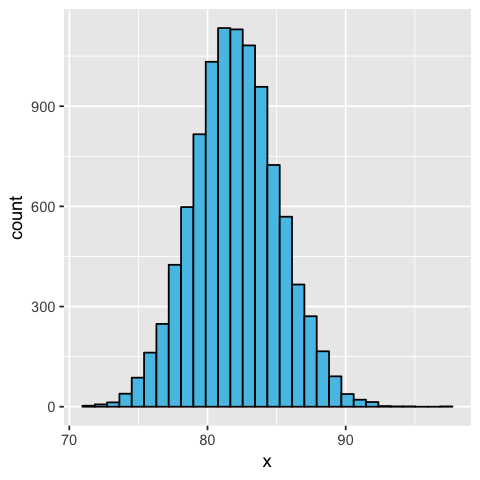

In [285]:
create_hist(attack_means) # Step 6

Since we have 10,000 points the 2.5 and 97.5 percentage interval correspond to the 250 and 9750 value

In [286]:
sorted_attacks <- sort(attack_means)
"Bootstraping Confidence Intervals"
c(sorted_attacks[250], sorted_attacks[9750]) # Step 6

[1] "Bootstraping Confidence Intervals"

[1] 76.00 88.22

Without any formula! And no assumption of normality nor central limit theorem! It is just computer power